<a href="https://colab.research.google.com/github/jalent27/DataLearnBballSalaryProjection/blob/main/Basketball_Analysis_Datares_Project_Jalen_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a linear regression model to find which features (statistics) are the most directly correlated to higher salary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import kagglehub
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Download latest version
path = kagglehub.dataset_download("jamiewelsh2/nba-player-salaries-2022-23-season")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'nba-player-salaries-2022-23-season' dataset.
Path to dataset files: /kaggle/input/nba-player-salaries-2022-23-season


In [ ]:
#Importing our basketball player data set

path = '/root/.cache/kagglehub/datasets/jamiewelsh2/nba-player-salaries-2022-23-season/versions/2'

os.listdir(path)

['nba_salaries.csv', 'nba_2022-23_all_stats_with_salary.csv']

In [ ]:
df = pd.read_csv(f"{path}/nba_2022-23_all_stats_with_salary.csv")

df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [ ]:
features = [
    'Age', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV',
    'FG%', '3P%', 'FT%', 'PER', 'TS%', 'USG%',
    'OWS', 'DWS', 'WS', 'BPM', 'VORP'
]

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['Team', 'Position', 'Total Minutes'], errors='ignore')

# Handle missing values
df = df.dropna(subset=['Salary'])
df = df.fillna(0)


# Select features + target
X = df[features]
y = df['Salary']

In [ ]:
#making sure X and y have the right dimensions
print(X.shape, y.shape)

(467, 19) (467,)


In [ ]:
# train/test split of 80/20
# random state makes sure thar data is now shuffled
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
X_train.head()

,Age,MP,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%,PER,TS%,USG%,OWS,DWS,WS,BPM,VORP
33,26,35.8,28.3,4.4,4.3,1.5,0.4,2.6,0.484,0.386,0.867,22.9,0.614,32.1,5.4,3.5,8.9,6.3,5.0
51,30,26.0,14.9,3.7,4.2,0.7,0.3,1.5,0.484,0.444,0.870,18.2,0.615,22.8,3.6,2.2,5.8,2.8,2.1
188,23,12.0,4.4,1.0,3.6,0.4,0.7,0.6,0.552,0.231,0.548,17.1,0.582,15.4,0.8,0.6,1.3,0.3,0.3
1,32,22.2,11.4,5.2,2.7,0.8,0.4,2.4,0.408,0.303,0.681,13.6,0.498,27.0,-0.4,0.7,0.3,-1.2,0.1
315,20,18.7,5.9,1.6,4.9,0.6,0.2,0.8,0.436,0.407,0.704,11.2,0.559,13.5,0.7,1.2,1.9,-1.7,0.1


In [ ]:
y_train.head()

,Salary
33,30913750
51,22600000
188,5377520
1,47345760
315,2000000


In [ ]:
# want to see how many samples are in train/test to verify the 80/20 split works accordingly
print('The number of samples in the train data is {}.'.format(X_train.shape[0]))
print('The number of samples in the test data is {}.'.format(X_test.shape[0]))

The number of samples in the train data is 373.
The number of samples in the test data is 94.


In [ ]:
#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the salary of nba players based on the x variables (testing values)
y_pred = model.predict(X_test)

#grab the r^2 value to see what percentage of our model the salary is explained by x variables.
r2 = r2_score(y_test, y_pred)
print(r2)

#mae --> average magnitude of difference between predicted and actual values
mae = mean_absolute_error(y_test, y_pred)
print(mae)

#rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


0.7019028020359083
4481277.396549085
Root Mean Squared Error: 6173225.010542551


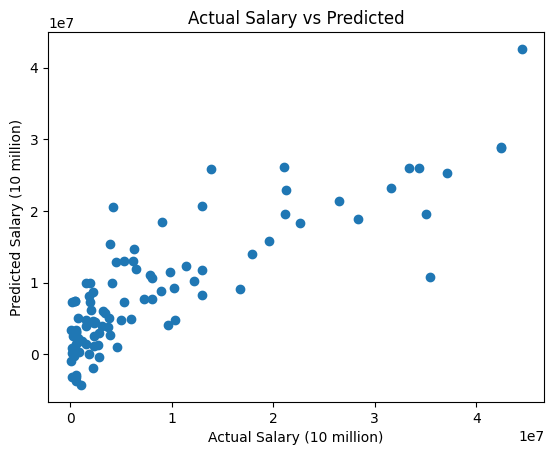

In [ ]:
#compare actual salary vs predicted salary based off our trained model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary (10 million)')
plt.ylabel('Predicted Salary (10 million)')
plt.title('Actual Salary vs Predicted')
plt.show()

In [ ]:
#examine feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

   Feature   Coefficient
8      FG%  1.495562e+07
14     OWS  8.649462e+06
15     DWS  8.505479e+06
6      BLK  1.601916e+06
18    VORP  1.217699e+06
0      Age  7.954871e+05
17     BPM  7.534016e+05
2      PTS  7.019418e+05
13    USG%  3.896892e+05
4      TRB  2.919539e+05
3      AST  2.085431e+05
1       MP -1.949697e+04
7      TOV -2.164241e+05
5      STL -2.365045e+05
11     PER -7.234409e+05
10     FT% -7.271338e+05
9      3P% -2.399790e+06
16      WS -8.433097e+06
12     TS% -1.604793e+07


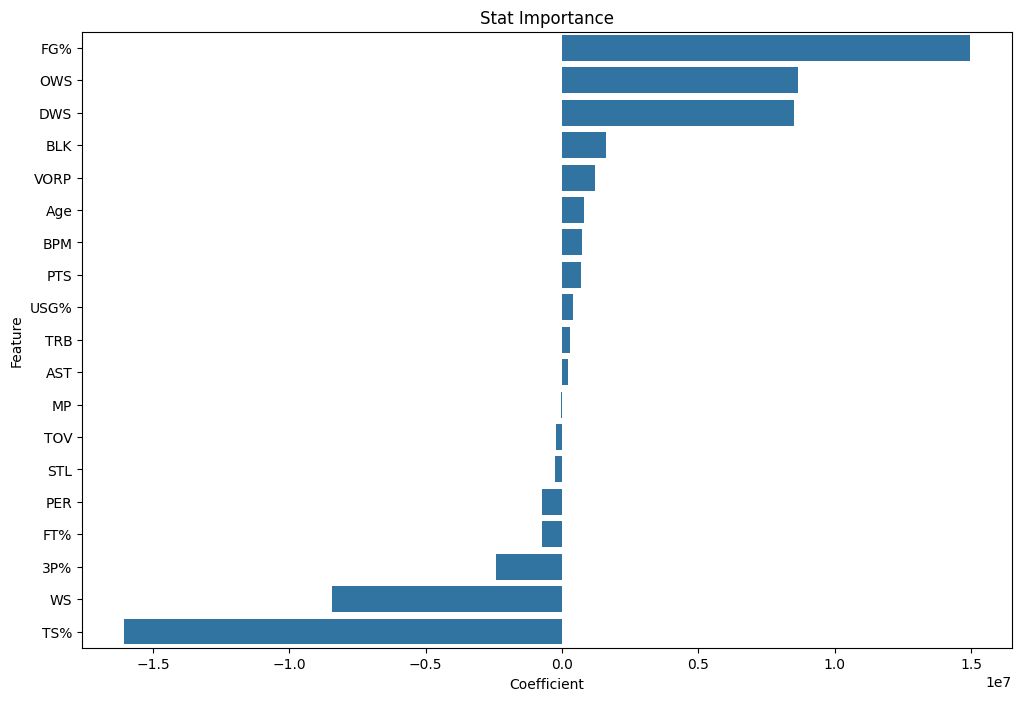

In [ ]:
#visualizing importance of each feature to salary
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Stat Importance')
plt.show()

Using a neural network model (rnn) to test how accurately we can predict salary based on game statistics of players.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = df.drop(columns=["Player Name"])

In [ ]:
#Splitting our data into test, and training
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_data = train_df.values
test_data = test_df.values

#Scaling our data so the neural network has better results.
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_df)
test_data = scaler.transform(test_df)

train_df.head()

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
382,382,1116112,23,43,7,15.3,2.3,5.3,0.422,0.7,...,12.1,18.2,0.4,0.5,0.9,0.063,-1.1,-1.3,-2.4,-0.1
22,22,35096500,26,62,62,29.4,6.5,11.8,0.548,1.5,...,10.8,22.0,3.4,2.0,5.4,0.142,1.4,0.7,2.1,1.9
305,305,2138160,21,57,4,16.6,3.5,8.0,0.441,0.9,...,10.6,27.8,0.3,0.7,1.0,0.049,-0.7,-2.0,-2.7,-0.2
46,46,26500000,36,63,63,30.5,3.6,7.6,0.476,2.3,...,7.0,11.9,3.6,2.7,6.3,0.157,1.6,1.7,3.3,2.5
153,153,7775400,21,82,65,28.3,3.8,8.3,0.464,1.4,...,12.3,15.7,0.5,3.0,3.5,0.072,-1.7,0.4,-1.3,0.4


In [ ]:
def create_dataset(dataset, look_back=60):
  X, Y = [], []
  for i in range(look_back, len(dataset)):
    X.append(dataset[i - look_back:i, :])  # all features
    Y.append(dataset[i, 1]) #target
  return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = X_train.reshape(X_train.shape)
X_test = X_test.reshape(X_test.shape)

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=22, batch_size=30, validation_split=0.2, verbose=2)

Epoch 1/22
9/9 - 14s - 2s/step - loss: 0.0662 - val_loss: 0.0365
Epoch 2/22
9/9 - 2s - 194ms/step - loss: 0.0445 - val_loss: 0.0373
Epoch 3/22
9/9 - 2s - 193ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 4/22
9/9 - 2s - 220ms/step - loss: 0.0444 - val_loss: 0.0368
Epoch 5/22
9/9 - 3s - 297ms/step - loss: 0.0449 - val_loss: 0.0358
Epoch 6/22
9/9 - 4s - 492ms/step - loss: 0.0455 - val_loss: 0.0363
Epoch 7/22
9/9 - 2s - 260ms/step - loss: 0.0433 - val_loss: 0.0357
Epoch 8/22
9/9 - 2s - 187ms/step - loss: 0.0432 - val_loss: 0.0361
Epoch 9/22
9/9 - 2s - 238ms/step - loss: 0.0439 - val_loss: 0.0371
Epoch 10/22
9/9 - 3s - 284ms/step - loss: 0.0433 - val_loss: 0.0387
Epoch 11/22
9/9 - 2s - 185ms/step - loss: 0.0433 - val_loss: 0.0378
Epoch 12/22
9/9 - 2s - 186ms/step - loss: 0.0447 - val_loss: 0.0376
Epoch 13/22
9/9 - 2s - 205ms/step - loss: 0.0424 - val_loss: 0.0362
Epoch 14/22
9/9 - 2s - 184ms/step - loss: 0.0438 - val_loss: 0.0395
Epoch 15/22
9/9 - 2s - 189ms/step - loss: 0.0441 - val_loss

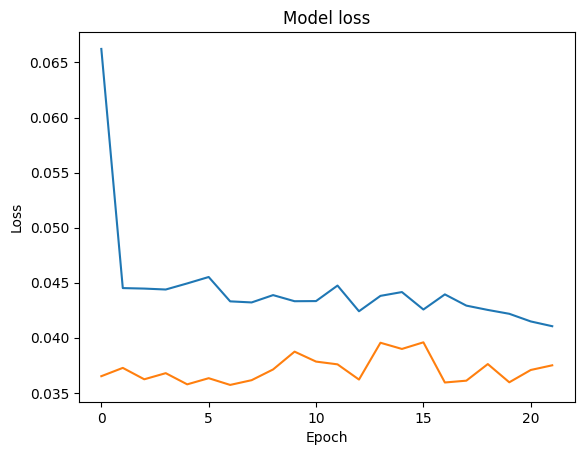

In [ ]:
#Plotting loss for each epoch of training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step


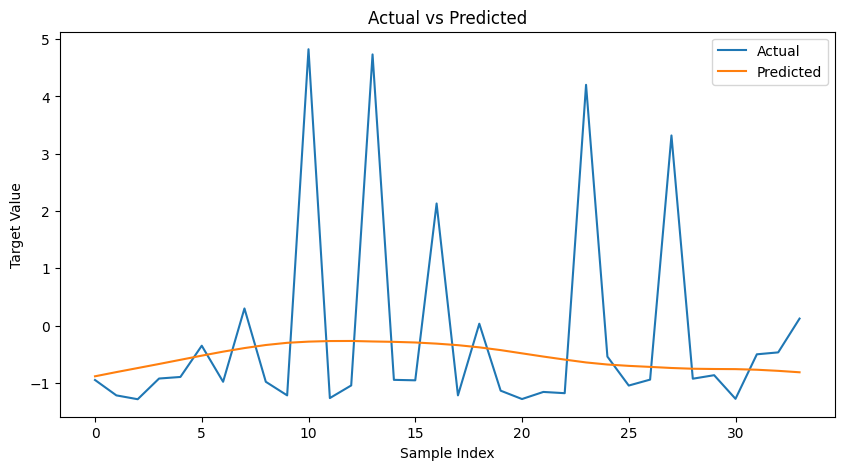

In [ ]:
y_pred = model.predict(X_test)

# 2. Inverse-transform the predictions and actual values
y_test_inv = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), train_df.shape[1]-1)), y_test.reshape(-1,1)], axis=1)
)[:, -1]

y_pred_inv = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred), train_df.shape[1]-1)), y_pred], axis=1)
)[:, -1]

# 3. Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()